In [2]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
cnn_results = pd.DataFrame()
for add in glob.glob("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Results/Version 2/CNN_Results/*.xlsx"):
  modality = add.split("_")[2]
  df1 = pd.read_excel(add,sheet_name="FoldsAccuracy")
  df2 = pd.read_excel(add,sheet_name="TestAccuracy")
  cnn_results = pd.concat([cnn_results,pd.DataFrame(data = {"data": [modality]*5,"model": "MLP" , "Validation Results" : df1[0],"Test Results" : df2[0]})])
  

In [4]:
cnn_results.reset_index(inplace=True)

In [5]:
cnn_results= cnn_results.drop(cnn_results [ (cnn_results["data"] == "F8") |(cnn_results["data"] == "F9")| (cnn_results["data"] == "F10")  ].index,axis=0)

In [6]:
cnn_results["data"] = cnn_results["data"].apply(lambda x: {"ct":"CT","pet":"PET","weighted": "Weighted","wavedec":"Wavedec","F1":"LP","F2":"RP","F3":"DWT",
             "F4":"DTCWT" , "F5": "CVT","F6":"NSCT","F7":"LP+SR","F11":"CVT+SR","F12":"NSCT+SR","F13":"SR","F14":"BCF","HSI":"HSI","PCA":"PCA",
             "TR-FF":"TR-FF","TR-PCA":"TR-PCA","Combined":"FTR"}[x])

In [26]:
sorter = ['CT',
 'PET',
 'LP',
 'RP',
 'DWT',
 'DTCWT',
 'CVT',
 'NSCT',
 'LP+SR',
 'CVT+SR',
 'NSCT+SR',
 'SR',
 'BCF',
 'HSI',
 'PCA',
 'Wavedec',
 'Weighted']
sorterIndex = dict(zip(sorter, range(len(sorter))))
cnn_results["data order"] = cnn_results["data"].map(sorterIndex)
cnn_results.sort_values("data order")

,index,data,model,Validation Results,Test Results,data order
0,0,CT,MLP,0.712121,0.646341,0
1,1,CT,MLP,0.696970,0.609756,0
2,2,CT,MLP,0.712121,0.268293,0
3,3,CT,MLP,0.727273,0.506173,0
4,4,CT,MLP,0.742424,0.469136,0
...,...,...,...,...,...,...
94,4,Weighted,MLP,0.712121,0.506173,16
92,2,Weighted,MLP,0.757576,0.634146,16
91,1,Weighted,MLP,0.636364,0.646341,16
90,0,Weighted,MLP,0.727273,0.646341,16


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mticker

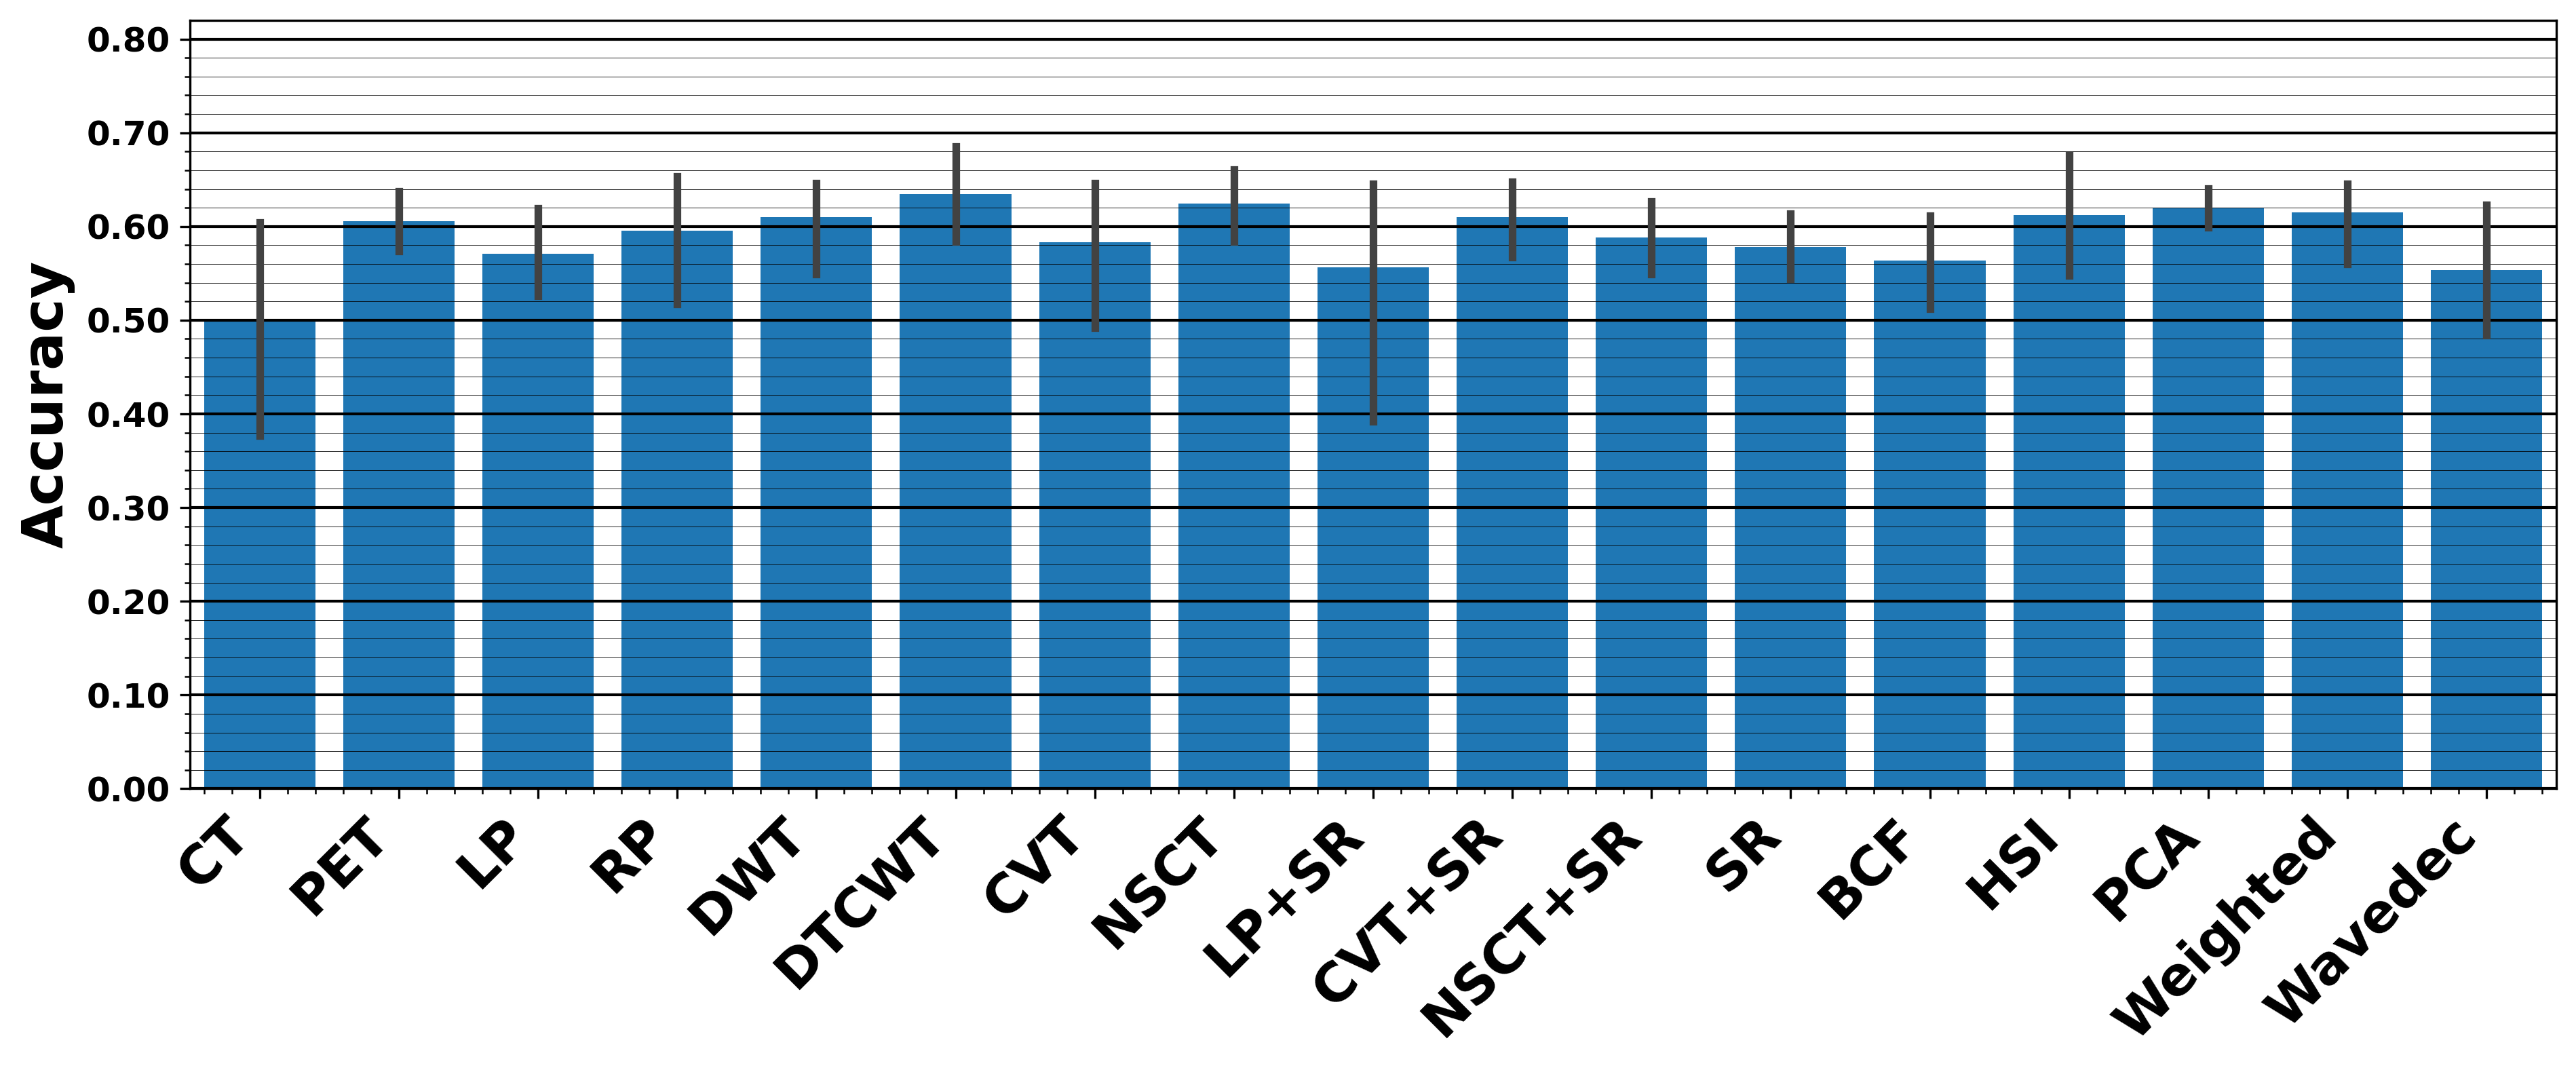

In [28]:
# ACC SCORE
fi,axes = plt.subplots(1,1,figsize = (15,5),dpi = 300)
ax =sns.barplot(data=cnn_results, x = "data" , y = "Test Results",hue= "model",palette= "tab10" ,ax = axes,saturation=2)
ax.set_ylim(0,0.82)
# ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid( which='major', color='black', linewidth=1.0,axis = "y")
ax.grid( which='minor', color='black', linewidth=0.2,axis = "y")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=19,fontweight = "bold")
# ax.set_yticks(ax.get_yticklabels())
# ax.tick_params(axis='y', labelsize=60)
# ax.yaxis.set_tick_params(labelsize=24)
label_format = '{:,.2f}'
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format.format(x) for x in ticks_loc],fontsize=20,fontweight = "bold")


fd = {'fontsize': 15,"fontweight" :"bold"}
# ax.set_yticklabels(np.round(ax.get_yticks(),2),fontdict=fd)
# legend_properties = {'weight':'bold',"size":19}
# ax.legend(loc = (0.1,1.03),ncol=4,prop=legend_properties)
ax.legend([],[], frameon=False)
ax.set_xlabel("")
ax.set_ylabel("Accuracy",fontweight = "bold",fontsize = 20)
ax.yaxis.set_tick_params(labelsize=12)
plt.savefig("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Results/Version 2/CNN_Results/Plots_total_results/Test_Acc_scores_CNN.jpg",bbox_inches = "tight")

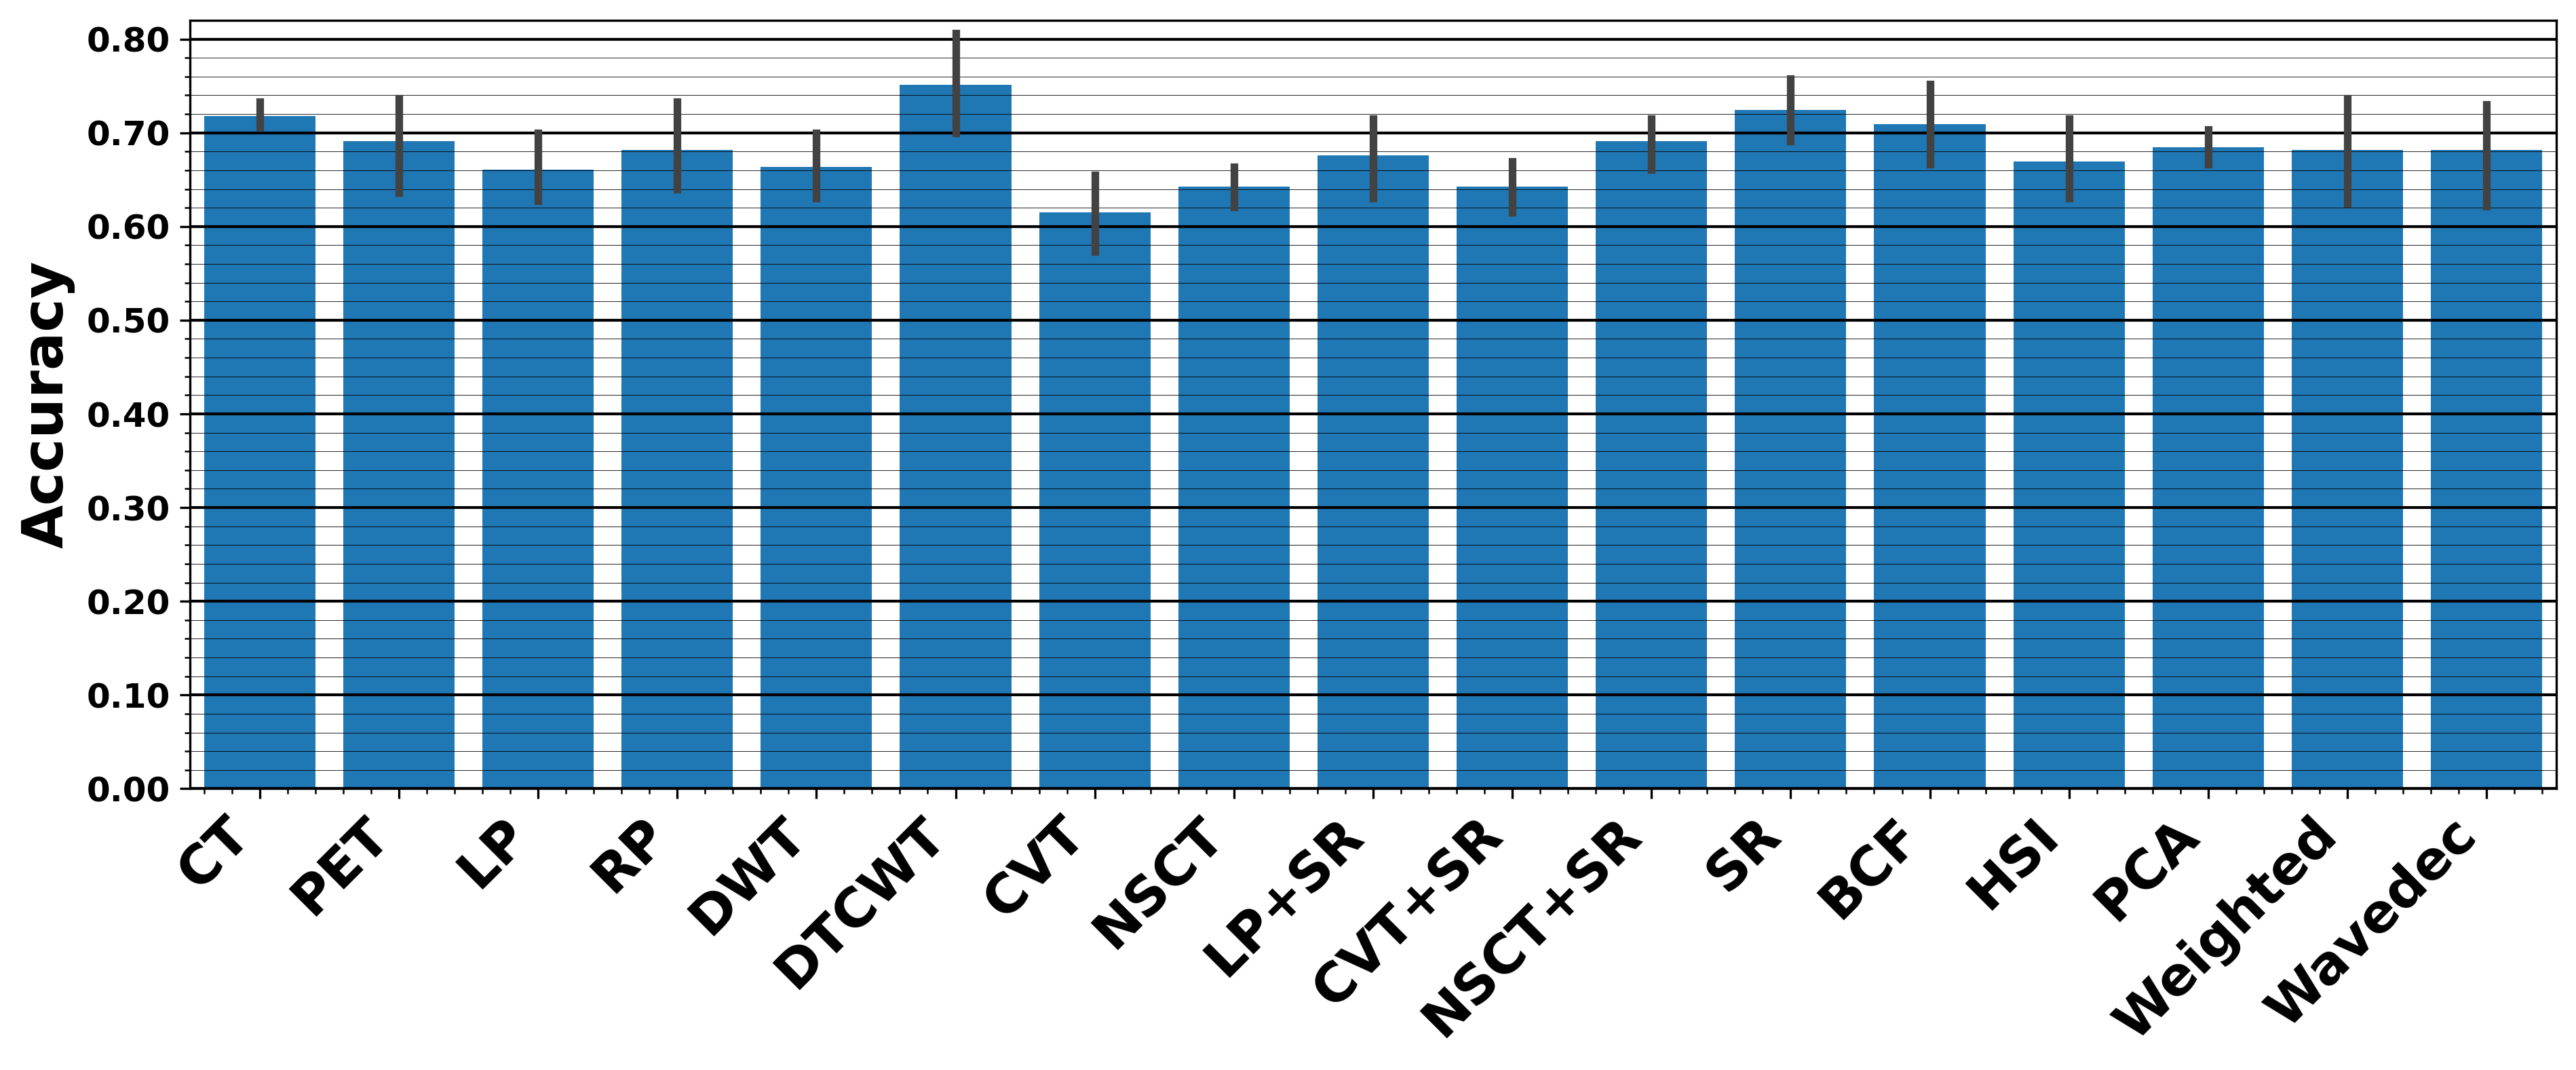

In [30]:
# ACC SCORE
fi,axes = plt.subplots(1,1,figsize = (15,5),dpi = 300)
ax =sns.barplot(data=cnn_results, x = "data" , y = "Validation Results",hue= "model",palette= "tab10" ,ax = axes,saturation=2)
ax.set_ylim(0,0.82)
# ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid( which='major', color='black', linewidth=1.0,axis = "y")
ax.grid( which='minor', color='black', linewidth=0.2,axis = "y")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=19,fontweight = "bold")
# ax.set_yticks(ax.get_yticklabels())
# ax.tick_params(axis='y', labelsize=60)
# ax.yaxis.set_tick_params(labelsize=24)
label_format = '{:,.2f}'
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format.format(x) for x in ticks_loc],fontsize=20,fontweight = "bold")


fd = {'fontsize': 15,"fontweight" :"bold"}
# ax.set_yticklabels(np.round(ax.get_yticks(),2),fontdict=fd)
# legend_properties = {'weight':'bold',"size":19}
# ax.legend(loc = (0.1,1.03),ncol=4,prop=legend_properties)
ax.legend([],[], frameon=False)

ax.set_xlabel("")
ax.set_ylabel("Accuracy",fontweight = "bold",fontsize = 20)
ax.yaxis.set_tick_params(labelsize=12)
plt.savefig("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Results/Version 2/CNN_Results/Plots_total_results/Valbb_Acc_scores_CNN.jpg",bbox_inches = "tight")

In [31]:
res_val = cnn_results.copy()
res_test = cnn_results.copy()
res_val.reset_index(inplace= True)
res_test.reset_index(inplace= True)

In [32]:
res_test.drop("Validation Results",axis=1,inplace = True)

In [33]:
res_val.drop("Test Results",axis=1,inplace = True)

In [34]:
res_test["result type"] = "Test"

In [35]:
res_val["result type"] = "Validation"

In [36]:
res_val.rename(columns = {"Validation Results":"Results"},inplace = True)
res_test.rename(columns = {"Test Results":"Results"},inplace = True)

In [37]:
vs = pd.concat([res_val,res_test],ignore_index = True)

In [38]:
vs.drop(["level_0","index"],axis = 1, inplace = True)

In [39]:
vs

,data,model,Results,data order,result type
0,CT,MLP,0.712121,0,Validation
1,CT,MLP,0.696970,0,Validation
2,CT,MLP,0.712121,0,Validation
3,CT,MLP,0.727273,0,Validation
4,CT,MLP,0.742424,0,Validation
...,...,...,...,...,...
165,Wavedec,MLP,0.646341,15,Test
166,Wavedec,MLP,0.646341,15,Test
167,Wavedec,MLP,0.487805,15,Test
168,Wavedec,MLP,0.530864,15,Test


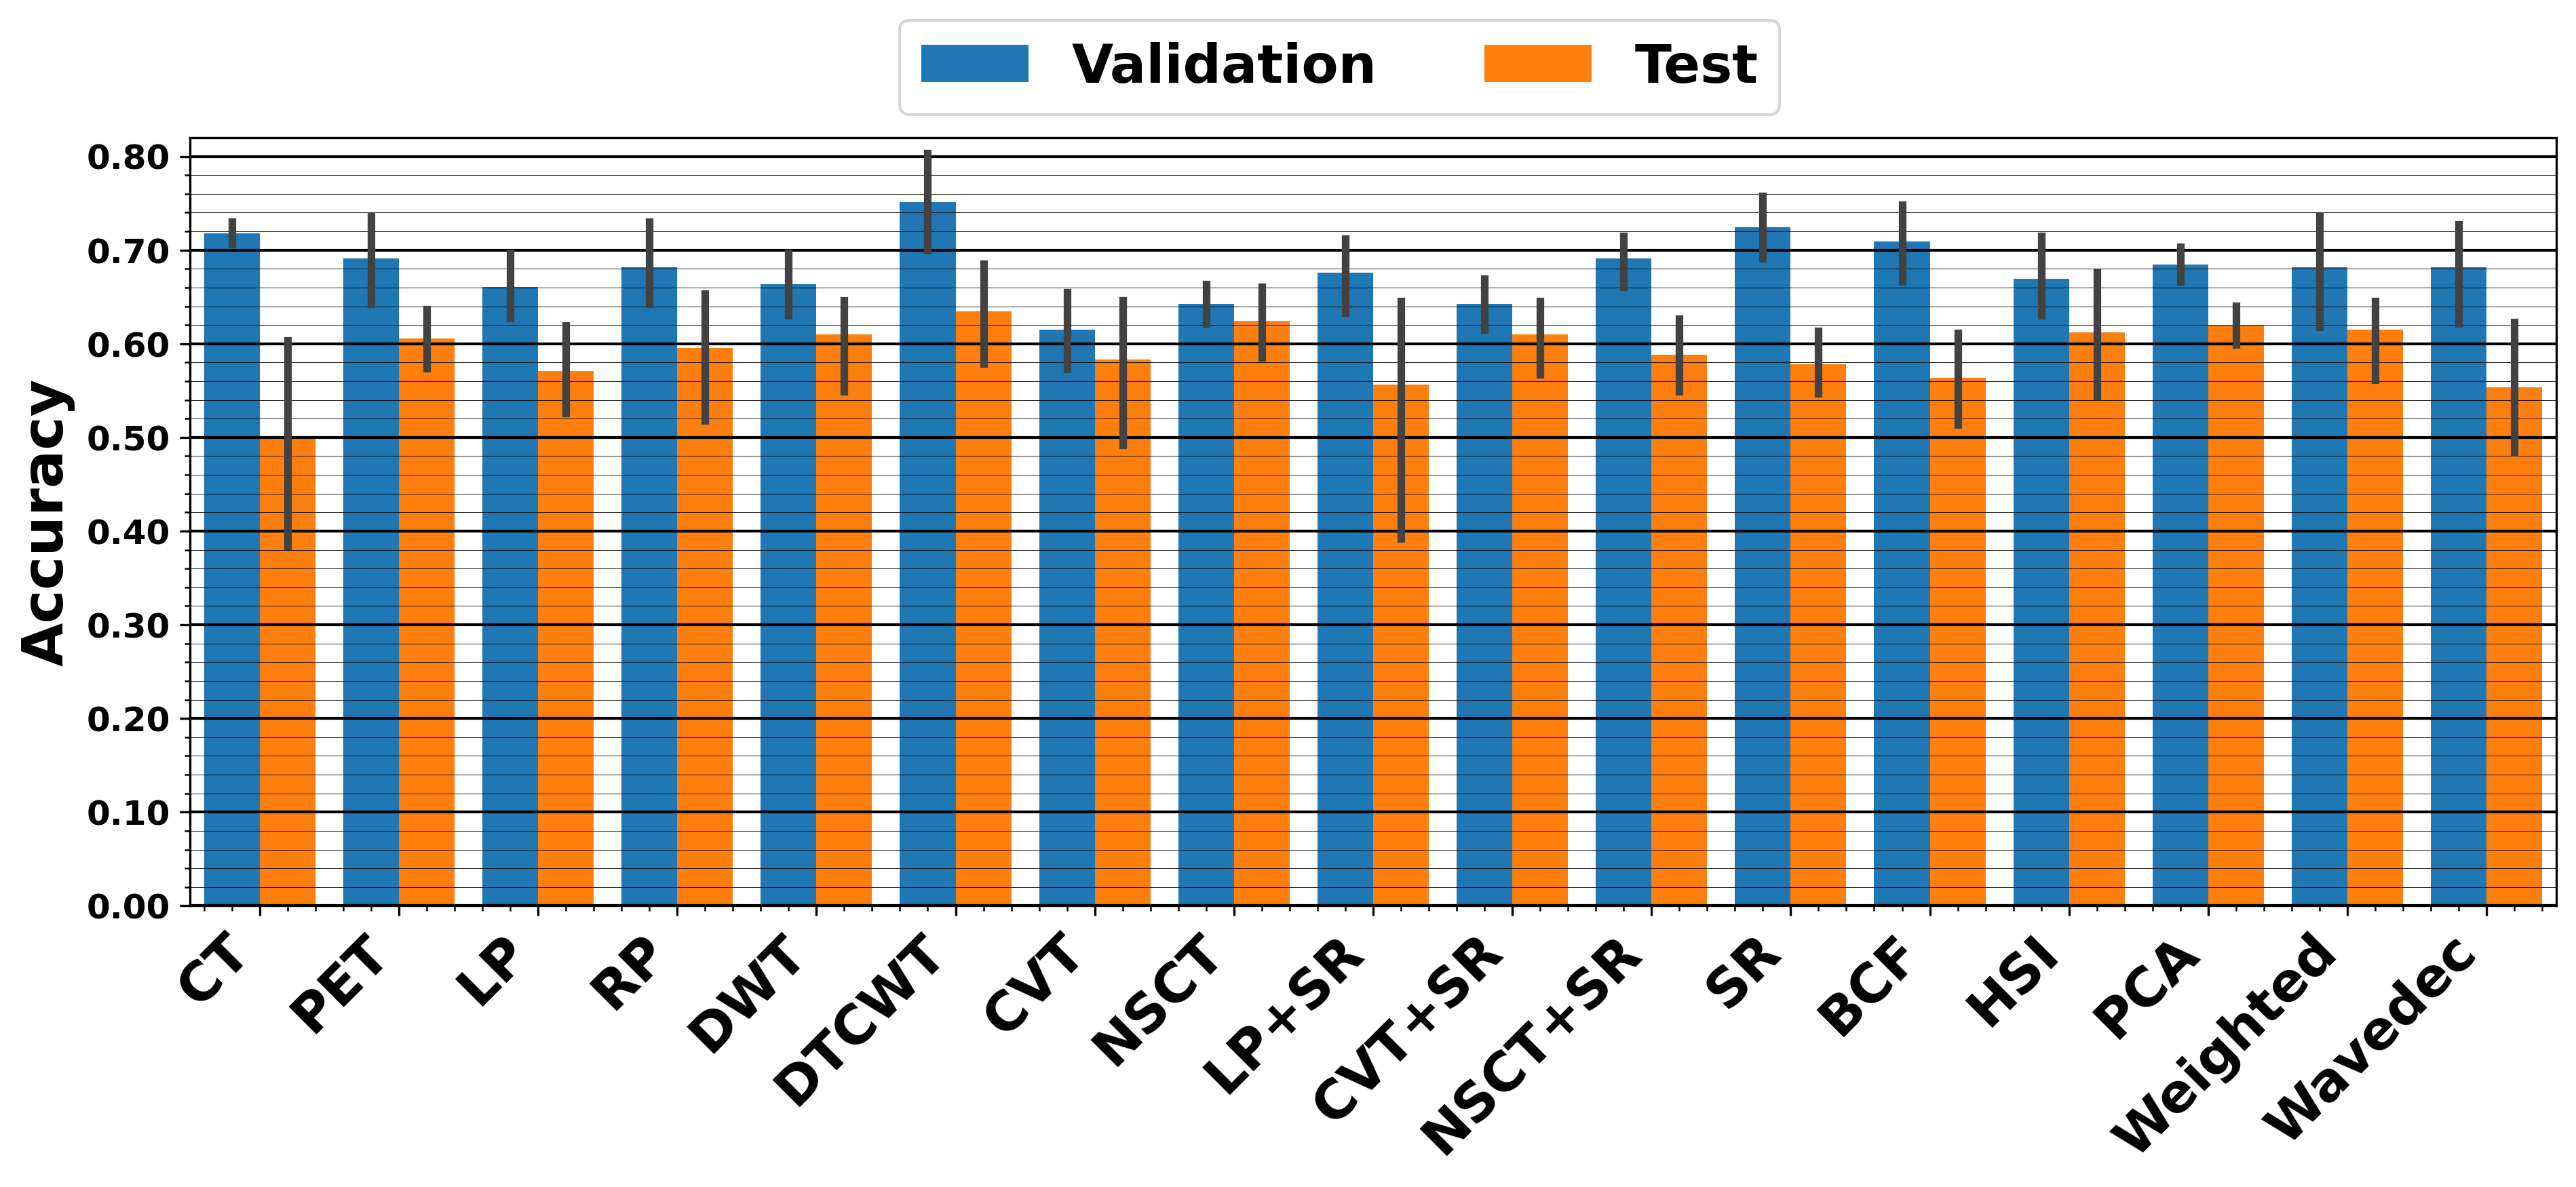

In [40]:
# ACC SCORE
fi,axes = plt.subplots(1,1,figsize = (15,5),dpi = 300)
ax =sns.barplot(data=vs, x = "data" , y = "Results",hue= "result type",palette= "tab10" ,ax = axes,saturation=2)
ax.set_ylim(0,0.82)
# ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid( which='major', color='black', linewidth=1.0,axis = "y")
ax.grid( which='minor', color='black', linewidth=0.2,axis = "y")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=19,fontweight = "bold")
# ax.set_yticks(ax.get_yticklabels())
# ax.tick_params(axis='y', labelsize=60)
# ax.yaxis.set_tick_params(labelsize=24)
label_format = '{:,.2f}'
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format.format(x) for x in ticks_loc],fontsize=20,fontweight = "bold")


fd = {'fontsize': 15,"fontweight" :"bold"}
# ax.set_yticklabels(np.round(ax.get_yticks(),2),fontdict=fd)
legend_properties = {'weight':'bold',"size":19}
ax.legend(loc = (0.3,1.03),ncol=4,prop=legend_properties)
ax.set_xlabel("")
ax.set_ylabel("Accuracy",fontweight = "bold",fontsize = 20)
ax.yaxis.set_tick_params(labelsize=12)
plt.savefig("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Results/Version 2/CNN_Results/Plots_total_results/VS_Acc_scores_CNN.jpg",bbox_inches = "tight")

In [41]:
vs.to_excel("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Results/Version 2/CNN_Results/Plots_total_results/VS.xlsx",index= False)

In [42]:
cnn_results.to_excel("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Results/Version 2/CNN_Results/Plots_total_results/CNN_results.xlsx",index= False)